# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.


---
# Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

---

***The goal is to analyze a dataset containing information on used cars to identify the key factors influencing their prices. This data task involves exploring and understanding the dataset to uncover patterns and correlations that contribute to variations in car prices. The outcome should be actionable insights and recommendations for a used car dealership, helping them understand what features consumers value in a used car.***


---
# Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

---

***IMPORT LIBRARIES FOR EXPLORATION***

In [1]:
# !pip install pandas
# !pip install seaborn
# !pip install plotly
# !pip install matplotlib
# !pip install scipy
# !pip install scikit-learn
# !pip install numpy

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

***LOAD DATASET***

In [3]:
# Load the dataset
df = pd.read_csv('data/vehicles.csv')

***DISPLAY BASIC INFO ABOUT DATA***
- Display basic information about the dataset
- Summary statistics for numerical features

In [4]:
print('---'*20,'\nINFO:\n','---'*20)
print(df.info(),'\n','---'*20)
print('DESCRIBE:\n','---'*20)
print(df.describe())

------------------------------------------------------------ 
INFO:
 ------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type  

***Explore missing values***
- visualize the missing values using a heatmap
- run a numeric coorelation matrix
- visualize a Chi/P-value contingency matrix

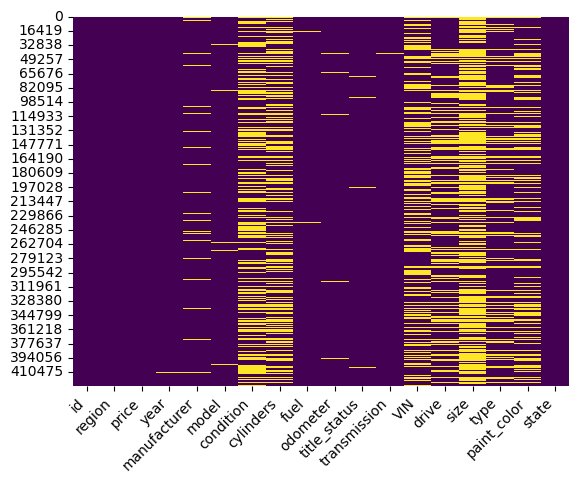

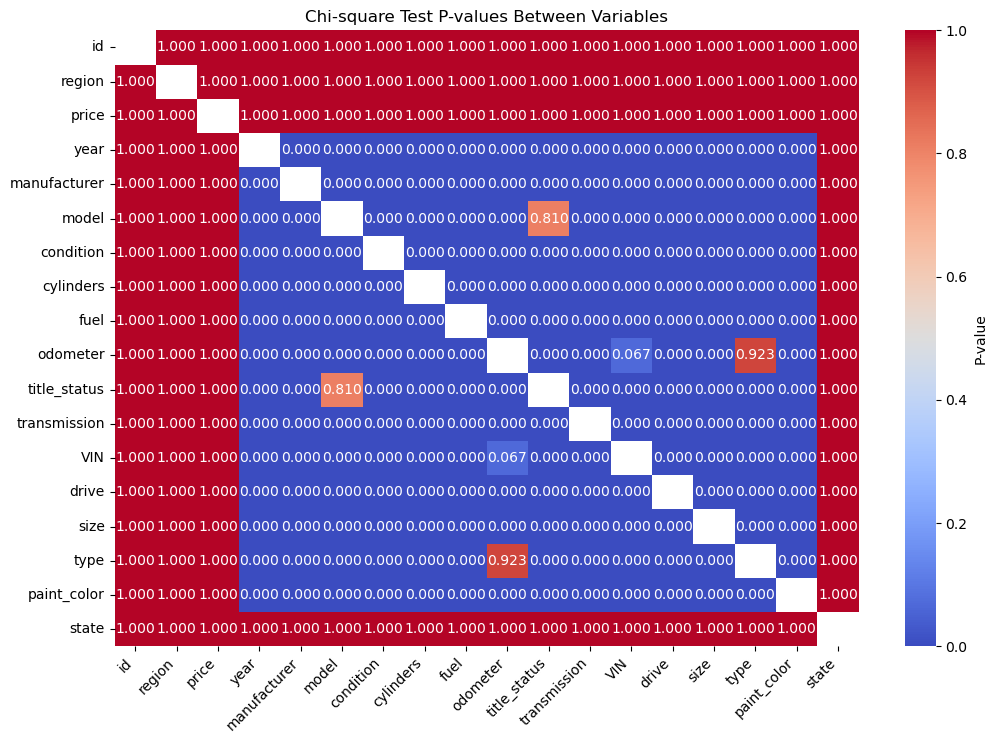

In [5]:
# PART 1
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

# PART 2
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

# PART 3
# loop through each column of dataframe and compare next columns values with current columns values and place them in a table
columns = df.columns
p_values = pd.DataFrame(index=columns, columns=columns)
for column1 in columns:
    for column2 in columns:
        if column1 != column2:
            contingency_table = pd.crosstab(df[column1].isnull(), df[column2].notnull())
            chi2, p, _, _ = chi2_contingency(contingency_table)
            p_values.at[column1, column2] = p
# Convert p-values to numeric
p_values = p_values.apply(pd.to_numeric, errors='coerce')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(p_values, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={'label': 'P-value'})
plt.title('Chi-square Test P-values Between Variables')
plt.xticks(rotation=45, ha='right')
plt.show()

***EXPLORE CATEGORICAL FEATURES AND THEIR UNIQUENESS***

In [6]:
for column in df.columns:
    print(f'COLUMN: {column}\n')
#     print(df[column].value_counts())
    print(f'FEATURES:\n{df[column].unique()}\n','---'*20)

COLUMN: id

FEATURES:
[7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]
 ------------------------------------------------------------
COLUMN: region

FEATURES:
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san lu

FEATURES:
[nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']
 ------------------------------------------------------------
COLUMN: state

FEATURES:
['az' 'ar' 'fl' 'ma' 'nc' 'ny' 'or' 'pa' 'tx' 'wa' 'wi' 'al' 'ak' 'ca'
 'co' 'ct' 'dc' 'de' 'ga' 'hi' 'id' 'il' 'in' 'ia' 'ks' 'ky' 'la' 'me'
 'md' 'mi' 'mn' 'ms' 'mo' 'mt' 'ne' 'nv' 'nj' 'nm' 'nh' 'nd' 'oh' 'ok'
 'ri' 'sc' 'sd' 'tn' 'ut' 'vt' 'va' 'wv' 'wy']
 ------------------------------------------------------------


***SAMPLING DATA TO REDUCE WORKLOAD OF PC ~ RAM***

In [7]:
sampled_df = df.sample(n=10000, random_state=42)

***EXPLORE DATA FURTHER USING DIFFERENT PLOTTING TYPES ~ In Order***
- histogram
- heatmap
- barplot
- lineplot
- scatterplot
- pearplot
- boxplot
- violinplot
- crosstab

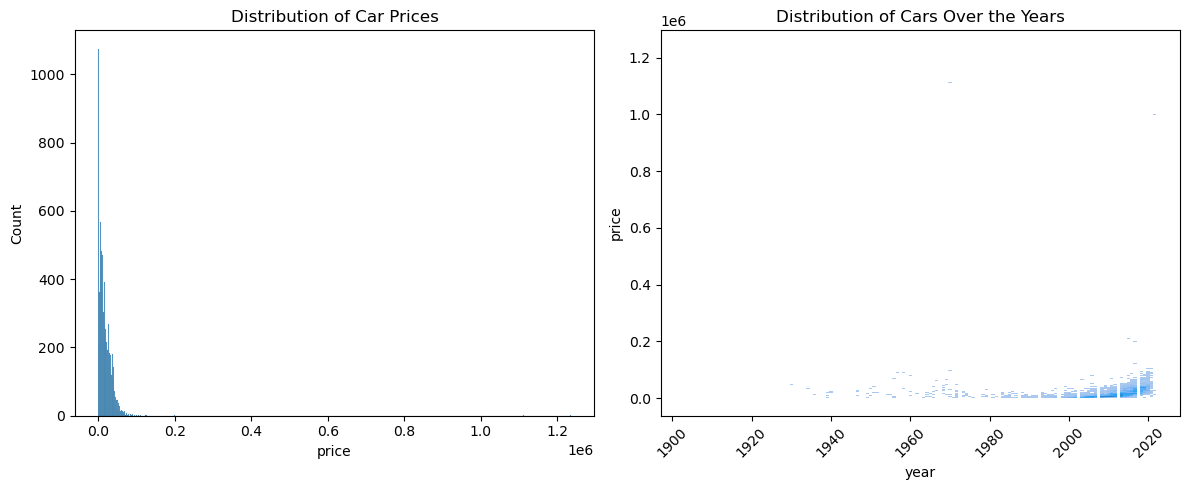

In [8]:
# HISTOGRAM

# Create a figure and axes with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram
sns.histplot(sampled_df['price'], bins=1000, ax=axes[0])
axes[0].set_title('Distribution of Car Prices')

# Plot the second histogram
sns.histplot(data=sampled_df, x='year', y='price', ax=axes[1])
axes[1].set_title('Distribution of Cars Over the Years')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for the second subplot

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

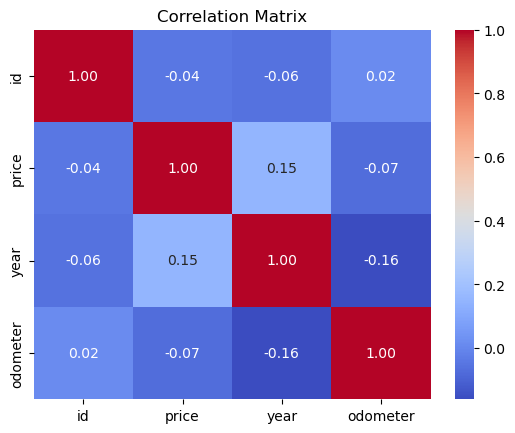

In [9]:
# HEATMAP

correlation_matrix = sampled_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

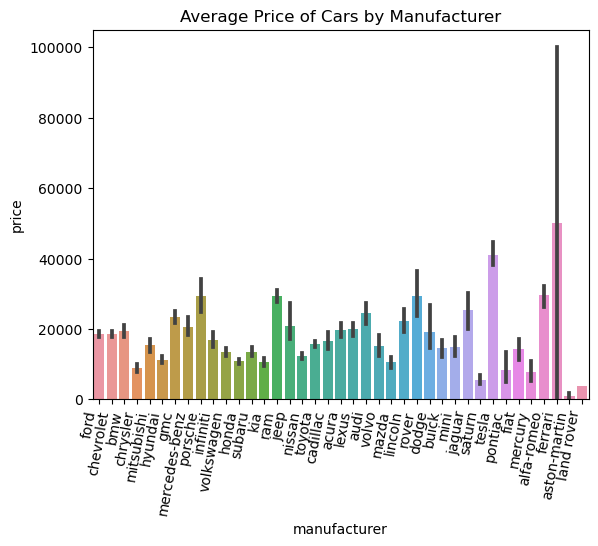

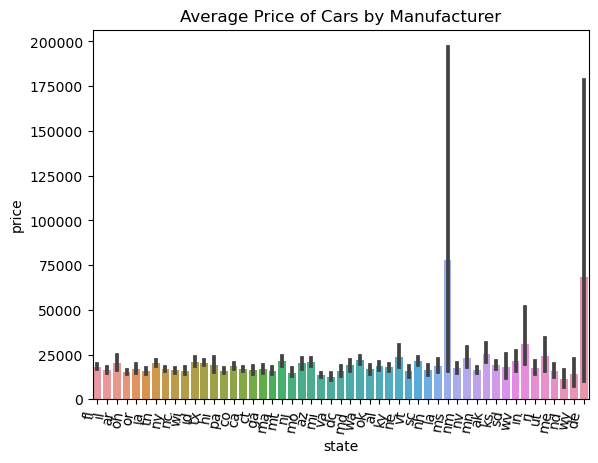

In [10]:
# BARPLOT

sns.barplot(data=sampled_df, x='manufacturer', y='price')
plt.xticks(rotation=80, ha='right')
plt.title('Average Price of Cars by Manufacturer')
plt.show()

sns.barplot(data=sampled_df, x='state', y='price')
plt.xticks(rotation=80, ha='right')
plt.title('Average Price of Cars by Manufacturer')
plt.show()

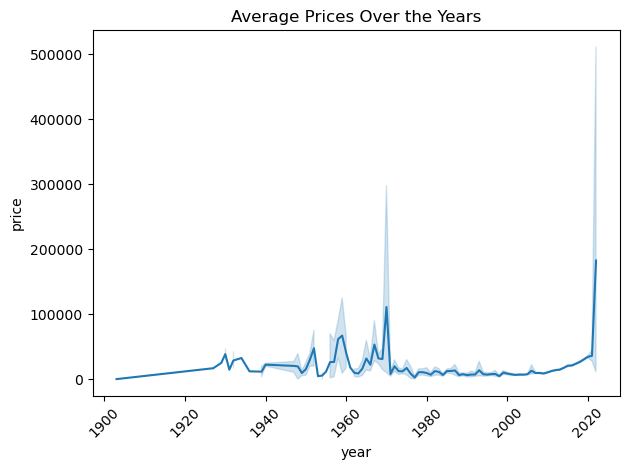

In [11]:
# LINEPLOT

sns.lineplot(data=sampled_df, x='year', y='price')
plt.title('Average Prices Over the Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

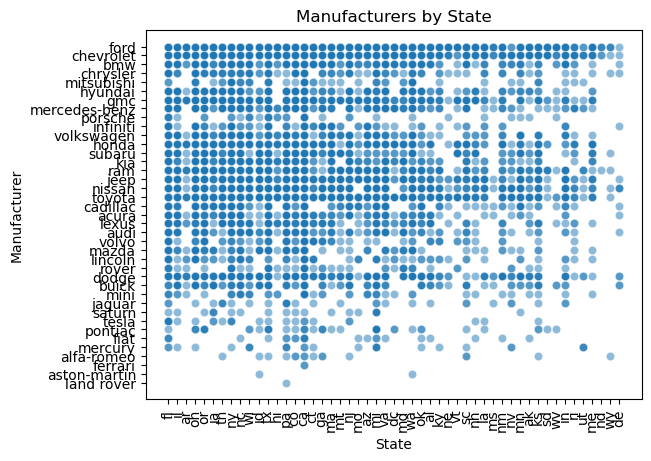

In [12]:
# SCATTERPLOT

sns.scatterplot(data=sampled_df, x='state', y='manufacturer', alpha=0.5)
plt.title('Manufacturers by State')
plt.xlabel('State')
plt.ylabel('Manufacturer')
plt.xticks(rotation=90, ha='center')
plt.show()

C:\Users\CAG\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


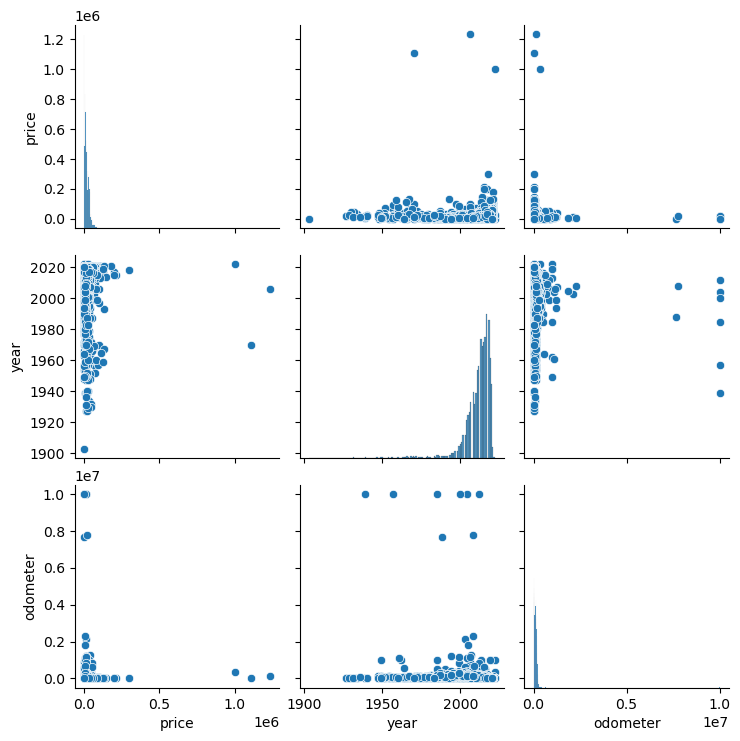

In [13]:
# PAIRPLOT

sns.pairplot(sampled_df[['price', 'year', 'odometer']])
plt.show()

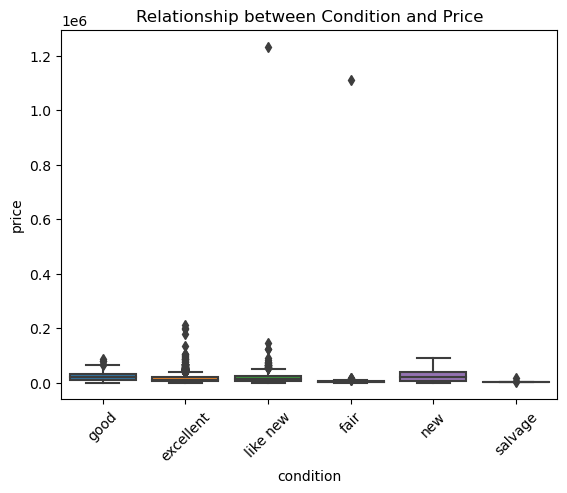

In [14]:
# BOXPLOT

sns.boxplot(data=sampled_df, x='condition', y='price')
plt.title(f'Relationship between Condition and Price')
plt.xticks(rotation=45)
plt.show()

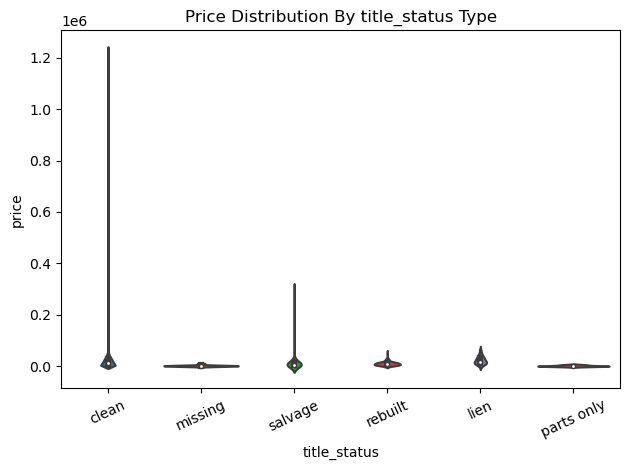

In [15]:
# VIOLINPLOT

sns.violinplot(data=sampled_df, x='title_status', y='price')
plt.title(f'Price Distribution By title_status Type')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

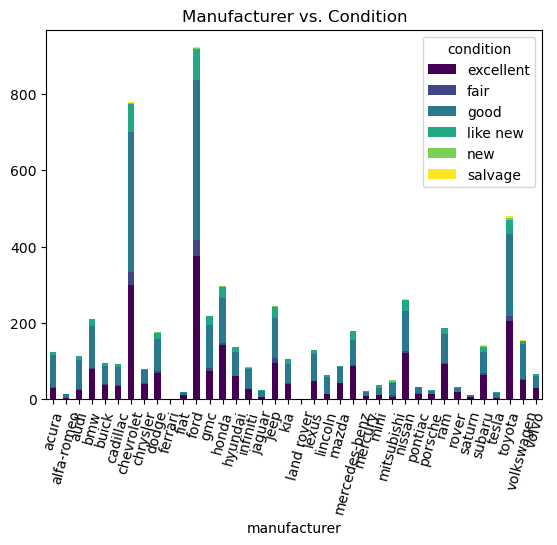

In [16]:
# CROSSTAB

pd.crosstab(sampled_df['manufacturer'], sampled_df['condition']).plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Manufacturer vs. Condition')
plt.xticks(rotation=75)
plt.show()